In [63]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
#sheet0 = pd.read_excel('source_data.xlsx', sheet=0)

In [65]:
#sheet0

In [66]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [67]:
excel_file.sheet_names

['Sheet1',
 'Sheet2',
 'Sheet3',
 'Sheet4',
 'Sheet5',
 'Sheet6',
 'Sheet7',
 'Sheet8',
 'Sheet9',
 'Sheet10',
 'Sheet11',
 'Sheet12',
 'Sheet13',
 'Sheet14',
 'Sheet15',
 'Sheet16',
 'Sheet17']

In [68]:
excel_sheets = [pd.read_excel(
        'source_data.xlsx',
        sheetname=sheet_name,
        skiprows=[0, 1, 2],
        header=1,
        #index_col=3
    ) for sheet_name in excel_file.sheet_names[1:]]

In [69]:
#excel_sheets[1]

In [70]:
excel_sheet_0 = excel_sheets[0]

In [71]:
#excel_sheet_0.columns.drop?
#excel_sheet_0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], inplace=True)

In [72]:
excel_sheet_0

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Область /год,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,1.0,Белгородская область,559,603,580,619,518,514,508,541,499,476,771
1,NaN,NaN,2.0,Брянская область,1136,1000,976,1003,650,263,586,575,315,541,301
2,NaN,NaN,3.0,Владимирская область,2337,2205,2160,1952,1682,1163,1297,1294,1336,1659,1702
3,NaN,NaN,4.0,Воронежская область,6114,5987,5422,5372,5405,4999,5265,5250,5191,5109,5020
4,NaN,NaN,5.0,Ивановская область,435,329,335,234,292,267,187,237,203,208,211
5,NaN,NaN,6.0,Калужская область,3495,3545,3750,3720,3665,3669,3627,3535,3606,3746,3394
6,NaN,NaN,7.0,Костромская область,71,59,59,66,62,48,40,53,54,45,34
7,NaN,NaN,8.0,Курская область,713,1204,1083,1052,936,950,1037,954,966,984,954
8,NaN,NaN,9.0,Липецкая область,49,56,72,73,71,66,62,65,49,93,159
9,NaN,NaN,10.0,Московская область,30899,31257,29444,28210,28744,28522,29174,29603,29866,30415,30605


In [73]:
#excel_sheets_cleaned = [sheet.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']) for sheet in excel_sheets]

In [74]:
#excel_sheets[1]

In [75]:
excel_sheet_1 = excel_sheets[1]

In [76]:
#excel_sheet_1

In [77]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [78]:
sheet0.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,23,21,27,23,19,16,16,14,15,16,NaN
1,Брянская область,20,19,20,23,24,17,23,21,21,22,NaN
2,Владимирская область,35,32,30,30,25,25,24,23,22,25,NaN
3,Воронежская область,57,65,66,60,58,58,59,57,56,53,NaN
4,Ивановская область,30,28,23,21,19,21,17,20,19,20,NaN


In [79]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [80]:
sheet1.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,559,603,580,619,518,514,508,541,499,476,771
1,Брянская область,1136,1000,976,1003,650,263,586,575,315,541,301
2,Владимирская область,2337,2205,2160,1952,1682,1163,1297,1294,1336,1659,1702
3,Воронежская область,6114,5987,5422,5372,5405,4999,5265,5250,5191,5109,5020
4,Ивановская область,435,329,335,234,292,267,187,237,203,208,211


In [81]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [82]:
sheet2.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,92,83,93,95,258,264,305,324,307,325,NaN
1,Брянская область,44,43,39,36,46,35,41,38,40,50,NaN
2,Владимирская область,297,285,281,270,265,246,351,331,336,356,NaN
3,Воронежская область,783,784,992,911,924,768,1133,789,783,869,NaN
4,Ивановская область,196,189,183,201,197,198,211,315,328,376,NaN


In [83]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [84]:
sheet3.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,15,16,20,23,46,45,53,51,56,60,NaN
1,Брянская область,8,13,12,14,15,15,18,14,20,24,NaN
2,Владимирская область,52,47,50,52,50,40,50,49,57,63,NaN
3,Воронежская область,119,144,162,178,151,151,257,165,142,152,NaN
4,Ивановская область,48,53,55,56,58,61,65,96,95,101,NaN


In [85]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [86]:
sheet4.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,1003,1071,1186,1226,1281,1257,1283,1275,1420,1386,NaN
1,Брянская область,472,464,524,506,687,695,649,579,478,424,NaN
2,Владимирская область,606,592,616,653,670,718,680,622,533,456,NaN
3,Воронежская область,2347,2331,2294,2418,2599,2641,2617,2506,2302,2030,NaN
4,Ивановская область,919,925,904,922,996,1054,1076,1038,910,785,NaN


In [87]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [88]:
sheet5.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,36,37,36,37,44,48,49,36,32,22,NaN
1,Брянская область,20,17,17,15,13,15,14,12,9,5,NaN
2,Владимирская область,16,16,18,21,21,19,15,11,11,8,NaN
3,Воронежская область,65,54,50,59,62,64,71,71,74,48,NaN
4,Ивановская область,44,42,47,46,49,50,47,56,59,38,NaN


In [89]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [90]:
sheet6.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,77,93,75,161,122,93,104,130,97,116,NaN
1,Брянская область,38,81,45,49,55,27,50,42,47,40,NaN
2,Владимирская область,118,98,99,114,135,109,151,120,209,199,NaN
3,Воронежская область,449,442,422,582,547,380,338,501,580,521,NaN
4,Ивановская область,98,103,501,1323,628,455,503,438,695,427,NaN


In [91]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [92]:
sheet7.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,45,31,50,55,53,68,89,74,106,89,NaN
1,Брянская область,10,19,23,31,26,47,66,53,68,63,NaN
2,Владимирская область,46,59,81,71,94,83,65,74,100,71,NaN
3,Воронежская область,70,110,112,93,94,111,158,166,158,154,NaN
4,Ивановская область,35,36,43,41,50,49,45,61,50,50,NaN


In [93]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [94]:
sheet8.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,16,22,14,12,10,10,13,19,12,10,NaN
1,Брянская область,0,0,1,3,10,5,9,9,0,7,NaN
2,Владимирская область,11,14,16,19,0,0,9,7,0,11,NaN
3,Воронежская область,11,9,17,19,12,21,19,9,59,31,NaN
4,Ивановская область,0,0,0,4,3,0,8,10,11,1,NaN


In [95]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [96]:
sheet9.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,550,689,963,1207,981,1215,1030,1614,1421,1837,NaN
1,Брянская область,690,602,589,803,912,1021,1066,1221,1225,1281,NaN
2,Владимирская область,1653,1863,2554,2837,3376,2972,3239,3211,3310,3446,NaN
3,Воронежская область,1805,1844,1449,1641,1759,2293,1755,1666,1897,1974,NaN
4,Ивановская область,432,497,582,606,711,512,486,624,744,856,NaN


In [97]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [98]:
sheet10.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,48.0,56.1,70.3,74.0,82.6,85.8,87.6,87.9,89.3,92.7,NaN
1,Брянская область,40.8,47.6,54.3,59.4,65.4,69.4,71.8,74.7,80.5,83.7,NaN
2,Владимирская область,48.5,57.5,65.3,76.6,83.8,87.9,88.3,90.0,90.6,92.7,NaN
3,Воронежская область,56.9,57.1,64.7,68.8,74.0,80.1,78.2,82.1,86.0,89.8,NaN
4,Ивановская область,38.3,49.2,57.4,61.4,69.0,78.5,84.7,88.4,91.0,90.8,NaN


In [99]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [100]:
sheet11.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,"8,7","12,0","16,0","10,8","11,1",10.9,12.2,9.2,9.6,11.5,NaN
1,Брянская область,"6,2","8,0","9,6","7,3","7,9",8.8,9.6,8.9,7.8,8.2,NaN
2,Владимирская область,"10,7","16,4","10,8","8,2","10,2",9.5,10.8,12.8,10.7,12.6,NaN
3,Воронежская область,"12,2","14,2","11,8","11,6","8,6",8.6,9.2,9.0,10.0,10.3,NaN
4,Ивановская область,"4,5","4,1","3,5","5,2","5,7",5.8,5.1,8.5,8.4,6.3,NaN


In [101]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [102]:
sheet12.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,"1204,6","734,6","799,1","1213,6","1197,8","3072,3","2136,6",1629,"1107,4",4108.8,NaN
1,Брянская область,"440,0","592,2","831,3","718,1","415,7","929,7","1368,4","2426,7","2080,3",1246.3,NaN
2,Владимирская область,"673,5","1333,9","1857,1","1962,8","3204,0","2613,1","3314,9","3849,9","4720,8",5906.6,NaN
3,Воронежская область,"1733,9","2097,9","2454,6","6263,5","4674,6","3190,3","8995,3","6608,9","7564,3",6769.7,NaN
4,Ивановская область,"494,2","134,7","1004,0","636,5","4070,1","2519,5","811,8","797,1","377,8",225.0,NaN


In [103]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [104]:
sheet13.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,"2206,9","2052,7","13377,9","32978,9","10437,5",9391.6,15457.4,21683.4,21246.5,23098.3,NaN
1,Брянская область,"4461,4","5057,6","8161,4","10155,1","9913,6",4434.4,5807.6,11171.2,6654.9,8312.3,NaN
2,Владимирская область,"3390,6","7047,5","7023,2","5110,4","4665,0",4958,17029.9,26496.9,24829.9,22782.1,NaN
3,Воронежская область,"6407,7","5420,5","16037,5","11196,4","7505,1",13431.8,15588.5,16169.4,13520.8,24742.4,NaN
4,Ивановская область,"452,3","955,4","2496,0","2526,9","1619,6",2479.9,2492.8,514.7,463.1,795.2,NaN


In [105]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [106]:
sheet14.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,"1,5","1,1","5,3","10,4","4,1",2.6,3.7,4.0,4.3,4.4,NaN
1,Брянская область,"11,3","8,2","9,6","11,3","12,3",4.7,6.0,10.2,5.4,6.5,NaN
2,Владимирская область,"4,0","7,3","5,5","3,1","3,2",2.3,7.4,10.6,9.4,8.3,NaN
3,Воронежская область,"7,3","5,0","11,5","7,3","4,6",7.1,6.3,5.6,4.6,7.2,NaN
4,Ивановская область,"1,3","1,9","4,3","4,4","3,2",3.5,3.1,0.6,0.5,0.9,NaN


In [107]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [108]:
sheet15.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,1511,1514,1519,1525,1530,1532,1536,1541,1544,1548,NaN
1,Брянская область,1331,1317,1309,1300,1292,1275,1264,1254,1242,1233,NaN
2,Владимирская область,1473,1459,1449,1440,1430,1441,1432,1422,1413,1406,NaN
3,Воронежская область,2314,2295,2280,2270,2262,2335,2332,2330,2329,2331,NaN
4,Ивановская область,1100,1088,1080,1073,1067,1060,1054,1049,1043,1037,NaN


In [109]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [110]:
sheet16.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Белгородская область,144987.8,178846.1,237013.3,317656.3,304345.3,398361.4,507839.8,545517.2,569006.4,619388
1,Брянская область,66692.3,82100.4,102706.2,125834.4,126477.4,147024.0,174211.8,207397.5,219502.8,243026
2,Владимирская область,86926.8,112841.7,146663.0,175395.7,185824.6,224759.2,261222.6,286018.6,306641.4,327885
3,Воронежская область,133586.6,166176.5,222811.9,287072.1,301729.1,346568.2,474973.9,563965.4,611720.4,709068
4,Ивановская область,44415.4,55090.0,74752.0,86980.3,87061.9,109884.5,128905.4,136115.0,158228.7,151047


In [111]:
#union_df = pd.merge(sheet0, sheet1, on='Region')

In [112]:
#union_df

In [113]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [114]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

In [115]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

In [116]:
merged_df_list = []
for year in range(2005, 2014):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]
    result_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
    merged_df_list.append(result_df)
    for i in range(1, 17):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        merged_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

#for i, df in enumerate(merged_df_list):
#    print('\n' * 3, i + 2005, '\n', df.head())

/home/uldo/miniconda3/envs/CloudSML-Computational-Backend/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [117]:
merged_df_list[3].head(5)

,Region,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct
0,Белгородская область,23,619,95,23,1226,37,161,55,12,1207,74.0,"10,8","1213,6","32978,9","10,4",1525,317656.3
1,Брянская область,23,1003,36,14,506,15,49,31,3,803,59.4,"7,3","718,1","10155,1","11,3",1300,125834.4
2,Владимирская область,30,1952,270,52,653,21,114,71,19,2837,76.6,"8,2","1962,8","5110,4","3,1",1440,175395.7
3,Воронежская область,60,5372,911,178,2418,59,582,93,19,1641,68.8,"11,6","6263,5","11196,4","7,3",2270,287072.1
4,Ивановская область,21,234,201,56,922,46,1323,41,4,606,61.4,"5,2","636,5","2526,9","4,4",1073,86980.3


In [118]:
cluster_data = merged_df_list[0].values

In [119]:
cluster_data[:4, :]

array([['Белгородская область', 23, 559, 92, 15, 1003, 36, 77, 45, 16, 550,
        48.0, '8,7', '1204,6', '2206,9', '1,5', 1511, 144987.8],
       ['Брянская область', 20, 1136, 44, 8, 472, 20, 38, 10, 0, 690, 40.8,
        '6,2', '440,0', '4461,4', '11,3', 1331, 66692.3],
       ['Владимирская область', 35, 2337, 297, 52, 606, 16, 118, 46, 11,
        1653, 48.5, '10,7', '673,5', '3390,6', '4,0', 1473, 86926.8],
       ['Воронежская область', 57, 6114, 783, 119, 2347, 65, 449, 70, 11,
        1805, 56.9, '12,2', '1733,9', '6407,7', '7,3', 2314, 133586.6]], dtype=object)

In [120]:
#normalized_cluster_data = minmax_scale(cluster_data[:, 1:])
s = '0,5'

In [121]:
s.replace(',', '')
#s.isdigit?

'05'

In [122]:
d = '0,6'

In [123]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [124]:
cluster_data = merged_df_list[0]

In [125]:
cluster_data = cluster_data[cluster_data.columns.drop(['Region'])]

In [126]:
cluster_data = cluster_data.applymap(str_to_num)

In [127]:
cluster_data.head()

,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct
0,23,559,92,15,1003,36,77,45,16,550,48.0,8.7,1204.6,2206.9,1.5,1511,144987.8
1,20,1136,44,8,472,20,38,10,0,690,40.8,6.2,440.0,4461.4,11.3,1331,66692.3
2,35,2337,297,52,606,16,118,46,11,1653,48.5,10.7,673.5,3390.6,4.0,1473,86926.8
3,57,6114,783,119,2347,65,449,70,11,1805,56.9,12.2,1733.9,6407.7,7.3,2314,133586.6
4,30,435,196,48,919,44,98,35,0,432,38.3,4.5,494.2,452.3,1.3,1100,44415.4


In [128]:
#cluster_data.loc?

In [129]:
cluster_data = cluster_data.values

In [130]:
cluster_data[:4, :]

array([[23, 559, 92, 15, 1003, 36, 77, 45, 16, 550, 48.0, '8.7', '1204.6',
        '2206.9', '1.5', 1511, 144987.8],
       [20, 1136, 44, 8, 472, 20, 38, 10, 0, 690, 40.8, '6.2', '440.0',
        '4461.4', '11.3', 1331, 66692.3],
       [35, 2337, 297, 52, 606, 16, 118, 46, 11, 1653, 48.5, '10.7',
        '673.5', '3390.6', '4.0', 1473, 86926.8],
       [57, 6114, 783, 119, 2347, 65, 449, 70, 11, 1805, 56.9, '12.2',
        '1733.9', '6407.7', '7.3', 2314, 133586.6]], dtype=object)

In [131]:
#cluster_data.
#cluster_data = minmax_scale(cluster_data)

In [132]:
df0 = merged_df_list[0]

In [133]:
#df0.applymap?

In [134]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

In [135]:
#df0.applymap(detect_minus)

In [136]:
'''
for row in df0.itertuples():
    for item in row:
        #if item == '-':
        if isinstance(item, str) and ',' in item:
            print(item, row)
            '''

"\nfor row in df0.itertuples():\n    for item in row:\n        #if item == '-':\n        if isinstance(item, str) and ',' in item:\n            print(item, row)\n            "

In [137]:
#df0[df.applymap(detect_minus)]

In [138]:
#df0.loc[36]['PostgraduateNum'] = 0
#df0.loc[36]

In [139]:
df0 = df0.applymap(str_to_num)
df0.set_value(36, 'PostgraduateNum', 0)

,Region,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct
0,Белгородская область,23,559,92,15,1003,36,77,45,16,550,48.0,8.7,1204.6,2206.9,1.5,1511,144987.8
1,Брянская область,20,1136,44,8,472,20,38,10,0,690,40.8,6.2,440.0,4461.4,11.3,1331,66692.3
2,Владимирская область,35,2337,297,52,606,16,118,46,11,1653,48.5,10.7,673.5,3390.6,4.0,1473,86926.8
3,Воронежская область,57,6114,783,119,2347,65,449,70,11,1805,56.9,12.2,1733.9,6407.7,7.3,2314,133586.6
4,Ивановская область,30,435,196,48,919,44,98,35,0,432,38.3,4.5,494.2,452.3,1.3,1100,44415.4
5,Калужская область,33,3495,787,205,366,1,113,58,4,2130,47.8,14.0,1020.1,2715.1,5.3,1014,70953.9
6,Костромская область,8,71,18,2,438,0,42,19,1,1027,33.8,9.2,604.5,1523.5,4.8,709,44684.7
7,Курская область,23,713,66,24,960,18,125,59,1,1341,30.8,6.7,1080.2,1428.8,2.0,1184,86624.9
8,Липецкая область,10,49,43,27,0,0,81,10,0,646,50.4,11.6,927.3,6937.6,3.9,1181,145194.4
9,Московская область,206,30899,6456,1659,2740,63,1605,448,32,12771,58.1,10.0,7538.2,40005.3,9.7,6628,708062.1


In [140]:
#df0.set_value?
df0.iloc[36]

Region                                    Чеченская Республика
OrganizationNum                                              5
StaffNum                                                    55
PhDNum                                                      82
Ph.DNum                                                     39
PostgraduateNum                                              0
DoctoralNum                                                  0
PatentNum                                                    1
UsefulPatentsNum                                             0
CreatedTechnologyNum                                         0
UsefulTechnologyNum                                          0
ProportionOfOrganizationsToUseInternet                       0
ProportionOfInnovativeOrgainzations                          0
TechnologicalInnovationsCost                                 0
AmountOfInnovativeProducts                                   0
ProportionOfInnovativeProducts                         

In [141]:
cluster_data = df0.values

In [142]:
normalized_cluster_data = minmax_scale(cluster_data[:, 1:])

/home/uldo/miniconda3/envs/CloudSML-Computational-Backend/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


In [143]:
df0.iloc[0]

Region                                    Белгородская область
OrganizationNum                                             23
StaffNum                                                   559
PhDNum                                                      92
Ph.DNum                                                     15
PostgraduateNum                                           1003
DoctoralNum                                                 36
PatentNum                                                   77
UsefulPatentsNum                                            45
CreatedTechnologyNum                                        16
UsefulTechnologyNum                                        550
ProportionOfOrganizationsToUseInternet                      48
ProportionOfInnovativeOrgainzations                        8.7
TechnologicalInnovationsCost                            1204.6
AmountOfInnovativeProducts                              2206.9
ProportionOfInnovativeProducts                         

In [144]:
normalized_cluster_data[0]

array([ 0.02798982,  0.00584427,  0.00281389,  0.00133523,  0.02330553,
        0.03327172,  0.01466667,  0.02839117,  0.15533981,  0.02923666,
        0.54114994,  0.26204819,  0.08714524,  0.0202178 ,  0.05660377,
        0.14148127,  0.03506224])

In [145]:
km = cluster.KMeans(n_clusters=3)

In [146]:
y_km = km.fit_predict(normalized_cluster_data)

In [147]:
type(y_km)

numpy.ndarray

In [148]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [149]:
y_km.shape

(77,)

In [150]:
km.fit?

In [151]:
km.fit(normalized_cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [152]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [153]:
km.cluster_centers_

array([[ 0.02998119,  0.01255332,  0.00921783,  0.00751729,  0.02025221,
         0.02329288,  0.0230697 ,  0.023481  ,  0.03841283,  0.05689862,
         0.53768606,  0.22577266,  0.06470139,  0.01965208,  0.09691004,
         0.12999929,  0.02721674],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  0.58776313,
         0.98083427,  0.53012048,  0.7959473 ,  0.26394262,  0.27924528,
         1.        ,  1.        ],
       [ 0.11741185,  0.12104929,  0.05517226,  0.04223149,  0.05983556,
         0.06614735,  0.11643537,  0.18593961,  0.24965326,  0.39208256,
         0.623933  ,  0.50731497,  0.6292095 ,  0.4649409 ,  0.45444744,
         0.37678348,  0.10520122]])

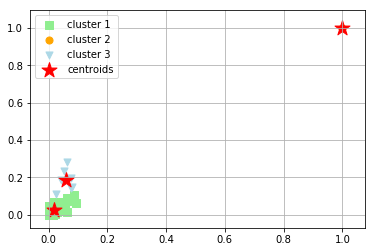

In [154]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 4],
            X[y_km == 0, 7],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 4],
            X[y_km == 1, 7],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 4],
            X[y_km == 2, 7],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 4],
            km.cluster_centers_[:, 7],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

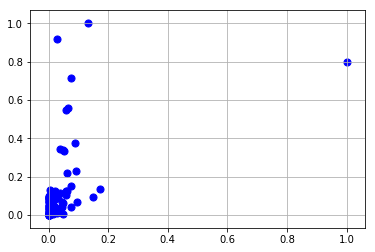

In [155]:
plt.scatter(X[:, 5], X[:, 12], c='blue', marker='o', s=50)
plt.grid()
plt.show()

In [156]:
km.cluster_centers_[0].shape

(17,)

NameError: name 'sheet18' is not defined

In [161]:
list_of_df[1][0]

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,559,603,580,619,518,514,508,541,499,476,771
1,Брянская область,1136,1000,976,1003,650,263,586,575,315,541,301
2,Владимирская область,2337,2205,2160,1952,1682,1163,1297,1294,1336,1659,1702
3,Воронежская область,6114,5987,5422,5372,5405,4999,5265,5250,5191,5109,5020
4,Ивановская область,435,329,335,234,292,267,187,237,203,208,211
5,Калужская область,3495,3545,3750,3720,3665,3669,3627,3535,3606,3746,3394
6,Костромская область,71,59,59,66,62,48,40,53,54,45,34
7,Курская область,713,1204,1083,1052,936,950,1037,954,966,984,954
8,Липецкая область,49,56,72,73,71,66,62,65,49,93,159
9,Московская область,30899,31257,29444,28210,28744,28522,29174,29603,29866,30415,30605


In [ ]:
sheet0.drop(sheet0.Region == 'ВСЕГО', inplace=True)

In [ ]:
sheet0.tail()

In [ ]:
sheet0[sheet0.Region == 'ВСЕГО']

In [ ]:
sheet0[sheet0.Region != 'ВСЕГО']